In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('churn_fresh.csv')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
import tensorflow
import keras

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Churn',axis=1)
y=df['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
len(X_train.columns)

26

In [ ]:
model=Sequential()
model.add(Dense(20, input_shape=(26,)))

In [ ]:
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(15)) ### HL2
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                540       
                                                                 
 activation_6 (Activation)   (None, 20)                0         
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 activation_7 (Activation)   (None, 15)                0         
                                                                 
 dropout_5 (Dropout)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.7349
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.7717
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.7831
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4389 - accuracy: 0.7902
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4370 - accuracy: 0.7927
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4273 - accuracy: 0.7963
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.7963
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.8021
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4270 - accuracy: 0.7998
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4242 - accura

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

44/44 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7790
Test score: 0.4519225060939789
Test accuracy: 0.7789623141288757


In [ ]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred[:5]

array([[0.33981577],
       [0.41979873],
       [0.00400513],
       [0.69137985],
       [0.36939463]], dtype=float32)

In [ ]:
y_test[:5]

2655    0
743     0
5570    1
64      1
3282    1
Name: Churn, dtype: int64

In [ ]:
Y_pred=[]
for element in y_pred:
  if element>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)

In [ ]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':Y_pred})
print(df1)

      Actual  Predicted
2655       0          0
743        0          0
5570       1          0
64         1          1
3282       1          0
...      ...        ...
2019       0          0
4388       1          1
4074       1          1
1293       0          1
4891       1          1

[1407 rows x 2 columns]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.66      0.49      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(0.5, 15.0, 'Predicted label')

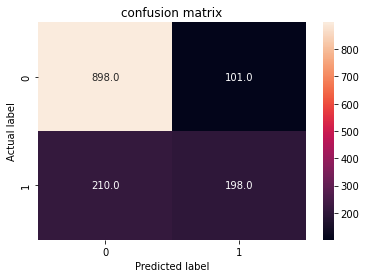

In [ ]:
cm = tensorflow.math.confusion_matrix(y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='.1f')
plt.title('confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
round((898+198)/(898+101+210+198),2) #accuracy

0.78

In [ ]:
round(898/(898+210),2) #precision for 0 class

0.81

In [ ]:
round(198/(101+198),2) #precision for 1 class

0.66

In [ ]:
round(898/(898+101),2) #recall for 0

0.9

In [ ]:
round(198/(210+198),2)

0.49